# JMAS Corner Plots

Here we present the corner plots for the joint modelling of astrophysical systematics (JMAS) method.
We compare the JMAS results with the LSST SRD (Science Requirement Document) forecasts for the cosmological parameters sector.
We also present the JMAS corner plots for the JMAS forecasts for the cosmological parameters for year 1 (Y1) and year 10 (Y10) LSST epochs.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from processing import fisher_processing as fp
from processing import gaussians_processing as gp
from processing import helpers as h


In [4]:
corner_path = "jmas_data/corner_plot_data/"
parameters = np.load(f"{corner_path}corner_plot_parameters.npy",
                     allow_pickle=True).item()
fisher_matrices = fp.fisher_matrices
inverse_fisher_matrices = fp.inverse_fisher_matrices
inverse_fisher_matrices_clipped = fp.inverse_fisher_matrices_clipped
gaussians_clipped = gp.gaussians_clipped
corner_colors = h.corner_colors
plots_path = f"plots_output/corner_plots/"

gdplot = h.gdplot
cosmoiaplot = h.cosmoiaplot
cosmoplot = h.cosmoplot
dpi = h.dpi


## JMAS vs SRD

CPU times: user 2min 8s, sys: 11.5 s, total: 2min 19s
Wall time: 37.5 s


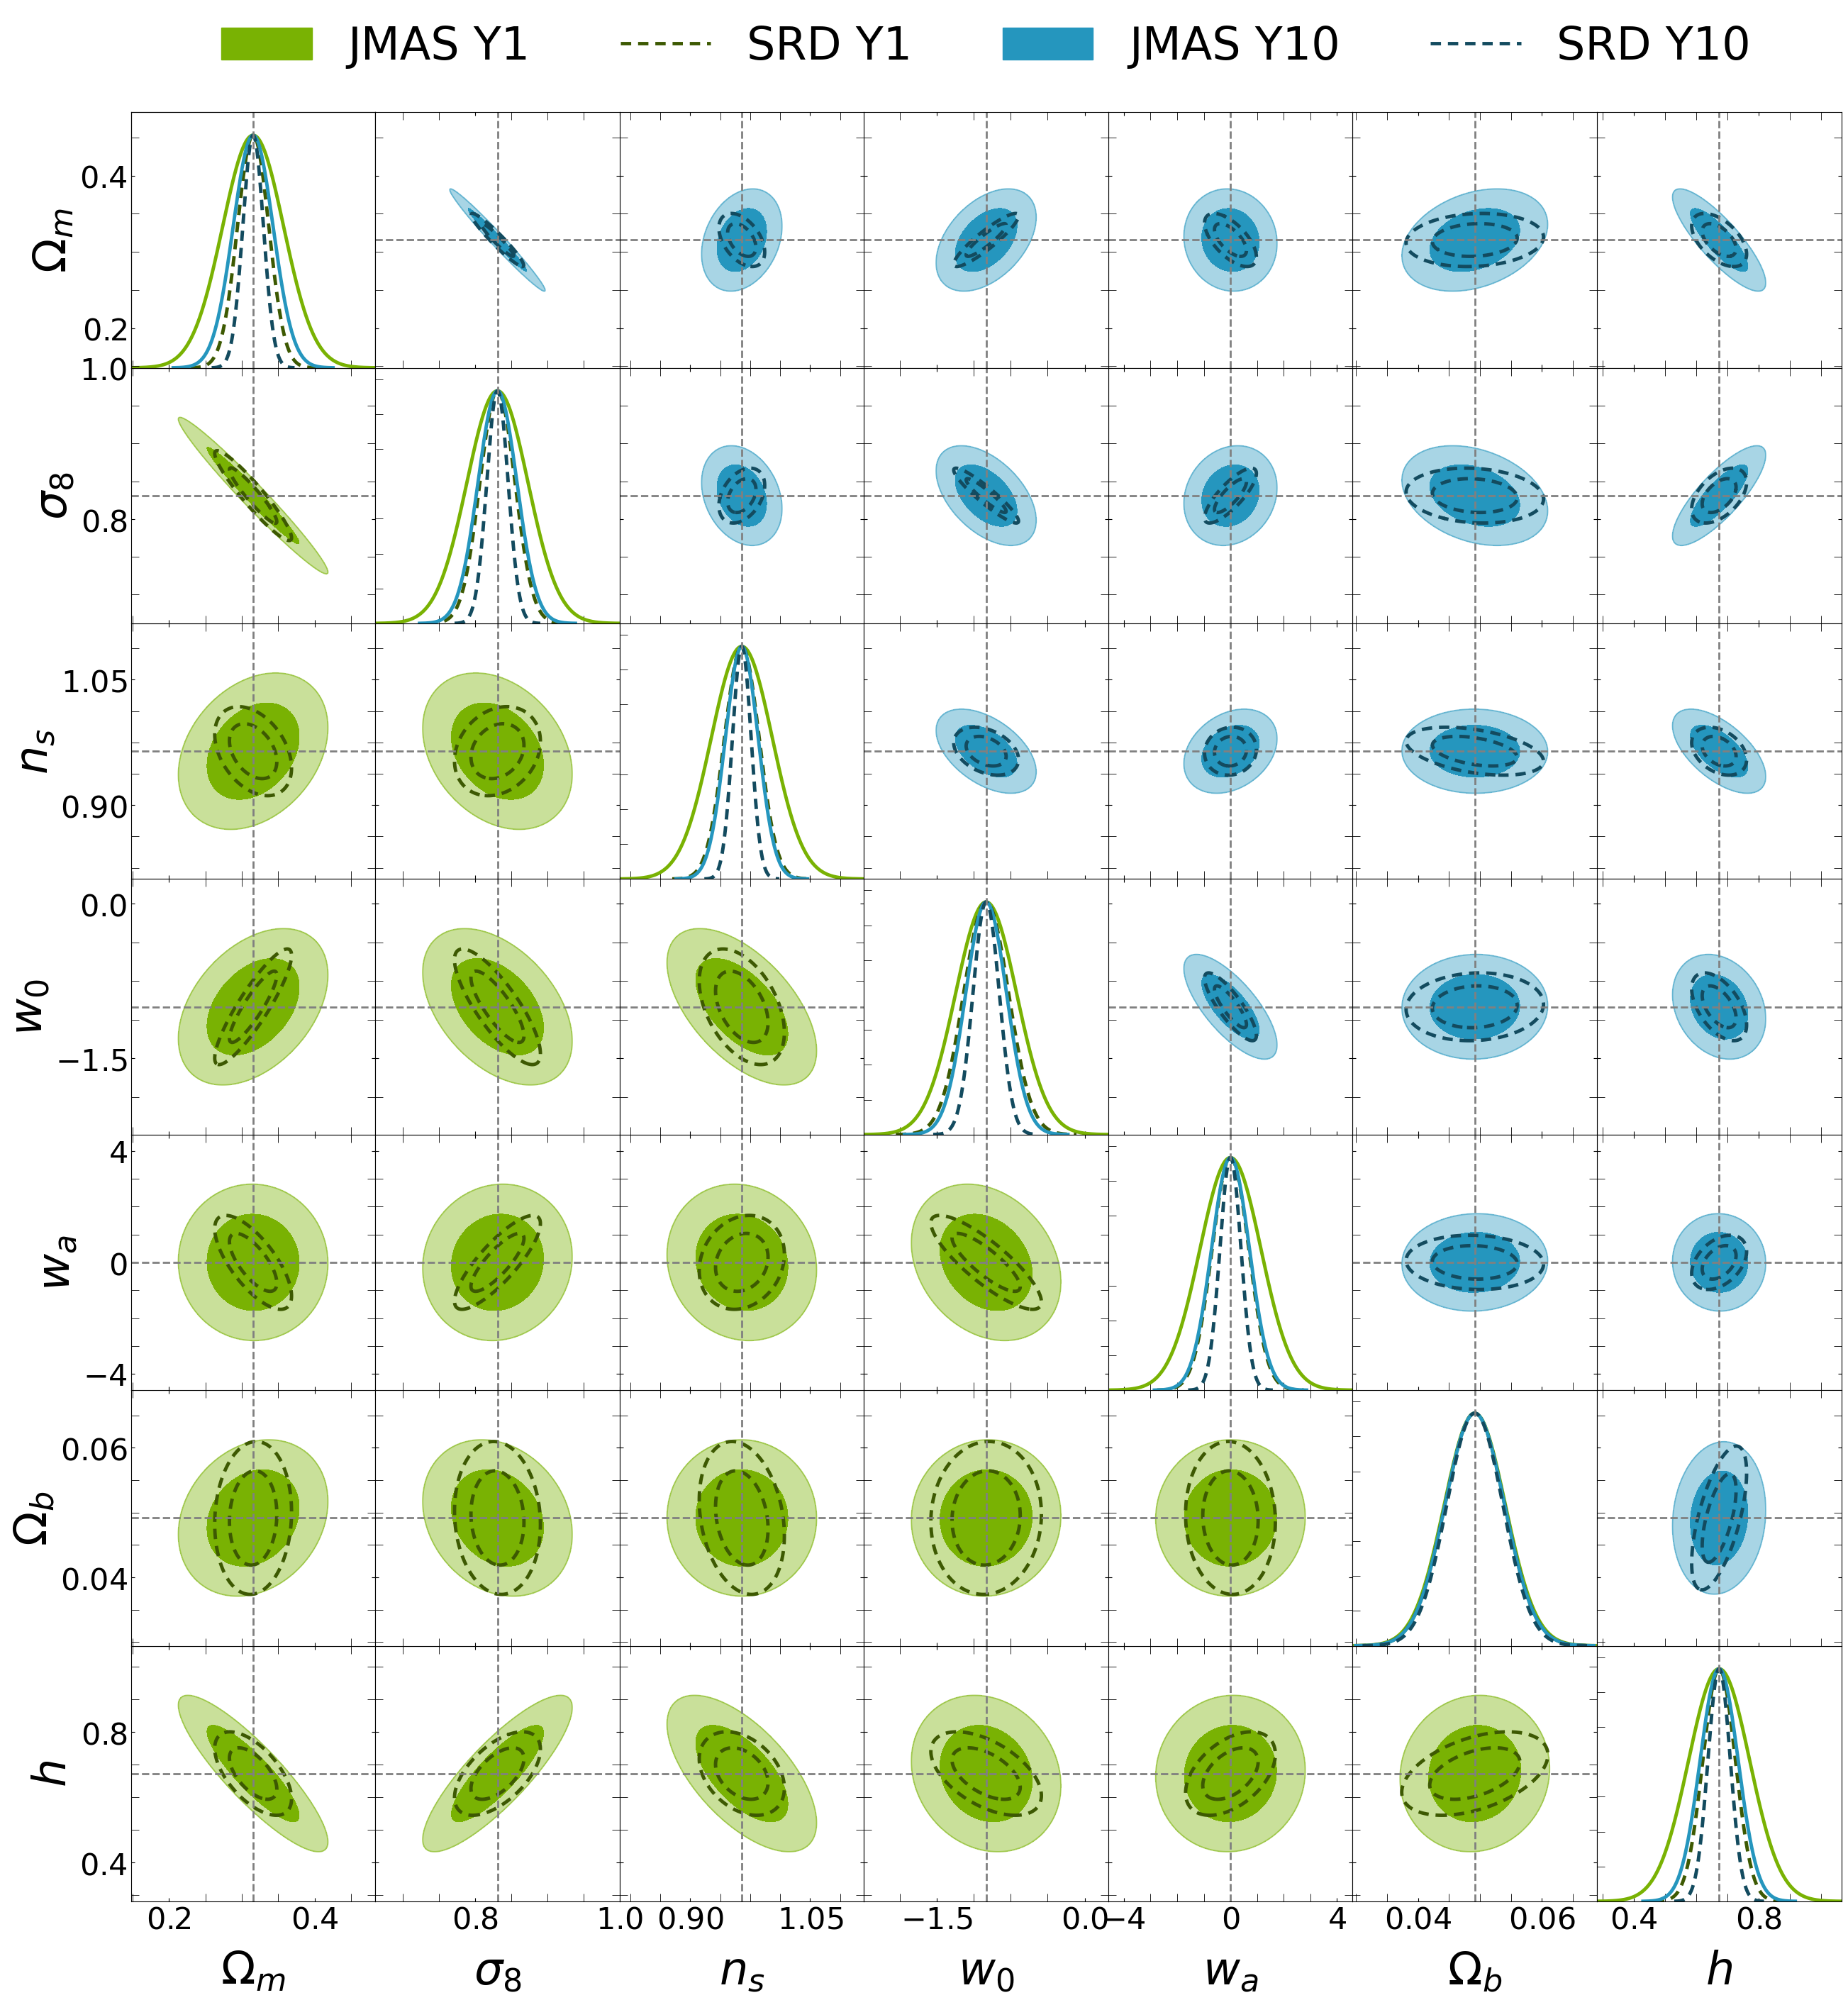

In [5]:
%%time

legend_labels = ["JMAS Y1", "SRD Y1",
                 "JMAS Y10", "SRD Y10"]

lower_kwargs = {'contour_colors': [corner_colors["jmas"]["1"],
                                   corner_colors["srd"]["1"],],
                "filled":[True, False, ],
                "contour_ls":["-", "--",],
                "contour_lws":[3.5, 3.5],}

upper_kwargs = {'contour_colors': [corner_colors["jmas"]["10"],
                                   corner_colors["srd"]["10"]],
                "filled":[True, False],
                "contour_ls":["-", "--"],
                "contour_lws":[3.5, 3.5],}

lower_covmats = [
    gaussians_clipped["jmas"]["cosmo"]["1"],
    gaussians_clipped["srd"]["cosmo"]["1"],
]

upper_covmats = [
    gaussians_clipped["jmas"]["cosmo"]["10"],
    gaussians_clipped["srd"]["cosmo"]["10"],
]

cosmoplot.triangle_plot(lower_covmats,
                legend_labels=legend_labels,
                upper_roots=upper_covmats,
                upper_kwargs=upper_kwargs,
                legend_ncol=4,
                markers=parameters["values"]["srd"]["cosmo"]["1"],
                **lower_kwargs)
plt.gcf().set_size_inches(30, 30)
h.customize_ticks(cosmoplot, minor_tick_length=8)

# Save the figure with the title
plt.savefig(f"{plots_path}corner_jmas_vs_srd_cosmo.pdf", bbox_inches="tight")
plt.savefig(f"{plots_path}corner_jmas_vs_srd_cosmo.png", bbox_inches="tight")


## JMAS Y1 all

In [ ]:
%%time

year = "1"
legend_labels = [f"JMAS Y{year}"]

lower_kwargs = {'contour_colors': [corner_colors["jmas"][year],],
                "filled":[True, False,],
                "contour_ls":["-", "--",],
                "contour_lws":[1.5, 1.5],}

lower_covmats = [
    gaussians_clipped["jmas"]["cosmoialf"][year],
]

gdplot.triangle_plot(lower_covmats,
                     legend_labels=legend_labels,
                     legend_ncol=4,
                     markers=parameters["values"]["jmas"]["cosmoialf"][year],
                     **lower_kwargs)

h.customize_ticks(gdplot)

# Save the figure with the title
plt.savefig(f"{plots_path}corner_jmas_y{year}_all.pdf", bbox_inches="tight", dpi=dpi["pdf"])
plt.savefig(f"{plots_path}corner_jmas_y{year}_all.png", bbox_inches="tight", dpi=dpi["png"])


## JMAS Y10 all

In [ ]:
%%time

year = "10"
legend_labels = [f"JMAS Y{year}"]

lower_kwargs = {'contour_colors': [corner_colors["jmas"][year],],
                "filled":[True, False,],
                "contour_ls":["-", "--",],
                "contour_lws":[1.5, 1.5],}

lower_covmats = [
    gaussians_clipped["jmas"]["cosmoialf"][year],
]

gdplot.triangle_plot(lower_covmats,
                     legend_labels=legend_labels,
                     legend_ncol=4,
                     markers=parameters["values"]["jmas"]["cosmoialf"][year],
                     **lower_kwargs)

h.customize_ticks(gdplot)

# Save the figure with the title
plt.savefig(f"{plots_path}corner_jmas_y{year}_all.pdf", bbox_inches="tight", dpi=dpi["pdf"])
plt.savefig(f"{plots_path}corner_jmas_y{year}_all.png", bbox_inches="tight", dpi=dpi["png"])
